In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=datasets.load_iris()
data=pd.DataFrame(data.data, columns=['sepal length (cm)','sepal width (cm)','petal length (cm)',
'petal width (cm)'])

In [5]:
def mean_impl(data):
    data=np.asarray(data)
    s=data.sum()/len(data)
    return s

In [6]:
def covariance_implmentation(data):
    size=data.shape[1]
    a=(np.asarray(data.iloc[:,0:1])-mean_impl(data.iloc[:,0:1]))
    if(size==2):
        b=(np.asarray(data.iloc[:,1:2])-mean_impl(data.iloc[:,1:2]))
    else:
        b=(np.asarray(data.iloc[:,0:1])-mean_impl(data.iloc[:,0:1]))
    p=((a*b).sum())
    return p/(data.shape[0]-1)
covariance_implmentation(data.iloc[:,0:2])

-0.04243400447427292

In [7]:
def Covariance_matrix(data):
    result=[]
    for i in range(data.shape[1]):
        for j in range(data.shape[1]):
            result.append(covariance_implmentation(data.iloc[:,[i,j]]))
    print(np.asarray(result).reshape(data.shape[1],data.shape[1]))
Covariance_matrix(data)

[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


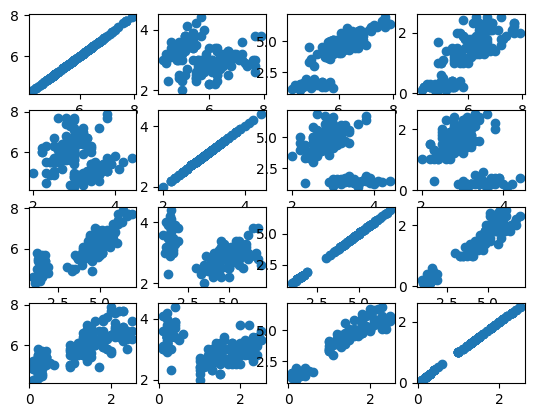

In [8]:
def scatterplot_impl(data):
    p=1
    for i in range(data.shape[1]):
        for j in range(data.shape[1]):
            plt.subplot(data.shape[1],data.shape[1],p)
            plt.scatter(data.iloc[:,i], data.iloc[:,j])
            p+=1

scatterplot_impl(data)

In [9]:

def std_dev(data):
    a = mean_impl(data)
    return np.sqrt(((np.asarray(data) - a) ** 2).sum())

def Pearson_Corr_Impl(data):
    a = np.asarray(data.iloc[:, 0]) - mean_impl(data.iloc[:, 0])
    b = a if data.shape[1] == 1 else np.asarray(data.iloc[:, 1]) - mean_impl(data.iloc[:, 1])
    return (a * b).sum() / (std_dev(data.iloc[:, 0]) * std_dev(data.iloc[:, 1 if data.shape[1] == 2 else 0]))

Pearson_Corr_Impl(data.iloc[:, 1:3])

-0.42844010433053975

In [10]:
from  collections import Counter
def Rank_finder(data):
    c=Counter(np.asarray(data.iloc[:,0:1]).flatten())
    p = sorted(c.items(), reverse=True)
    c1=np.sort(np.asarray(data.iloc[:,0:1]).flatten())[::-1]
    cnt=0
    lst=[]
    for i in p:
        a=(((i[1]+cnt)*(i[1]+cnt+1))/2 - (cnt*(cnt+1))/2)/i[1]
        cnt=cnt+i[1]
        for j in range(i[1]):
            lst.append(a)
    arrlst=np.asarray(lst)
    final=dict(np.unique(np.stack([c1,arrlst], axis=1),axis=0)[::-1])
    rank=[]
    c1=np.asarray(data.iloc[:,0:1]).flatten()
    for ele in c1:
        rank.append(final[ele])
    return rank

In [11]:
def Spearman_Rank_Corr(data):
    c1=Counter(np.asarray(data.iloc[:,0:1]).flatten())
    c2=Counter(np.asarray(data.iloc[:,1:2]).flatten())
    data_len=data.shape[0]
    value=[]
    for i in dict(c1).values():
        value.append((i*(i*i-1))/12)
    for i in dict(c2).values():
        value.append((i*(i*i-1))/12)
    value=np.asarray(list(set(value))).sum()
    rank1=np.asarray(Rank_finder(data.iloc[:,0:1]))
    rank2=np.asarray(Rank_finder(data.iloc[:,1:2]))
    dist=rank1-rank2
    dist2=(dist*dist).sum()
    r=1-(6*(dist2+value))/(data_len*(data_len*data_len-1))
    return r
Spearman_Rank_Corr(data.iloc[:,[1,1]])

0.9958318147473221

In [12]:
data = '/content/iris - iris.csv'
df = pd.read_csv(data)

In [13]:
from math import sqrt
import seaborn as sns

In [14]:
iris = sns.load_dataset('iris')

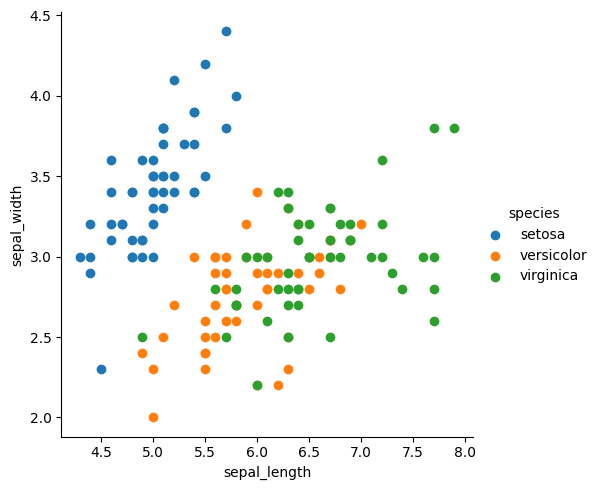

In [15]:
sns.FacetGrid(iris, hue="species", height=5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()

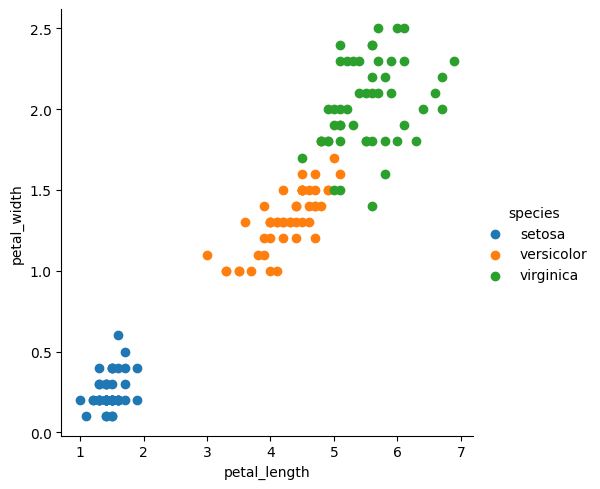

In [16]:
sns.FacetGrid(iris, hue="species", height=5) \
   .map(plt.scatter, "petal_length", "petal_width") \
   .add_legend()